# Organic Market Basket Analysis 

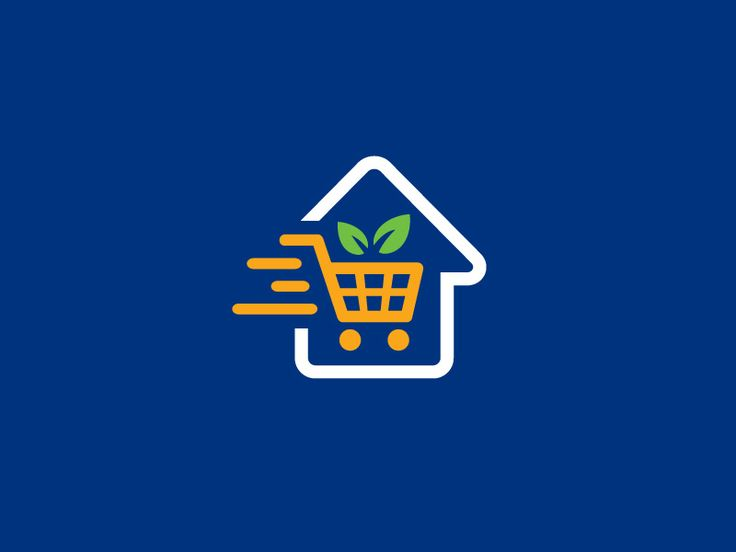

## Business Overview

- Starting an organic food delivery service
- what is the market like?

Organic food is the fastest-growing category in retail grocery today, but still represents just 6% of the total market share in the U.S. To grow the market, organic trade associations provide coupons and other advertising to incentivize purchases, but currently such promotions are not targeted to individual consumers.

Can likely organic buyers be identified in a way that grows organic sales?

Can we identify users who are likely to buy organic produce based on their past shopping history, combining recommendations from a collaborative filtering model with predictions from a logistic regression model.

The model identifies ___% new likely buyers of organic food and reduces spam to unlikely buyers by 40% compared to not targeting. More focused targeting will increase lift in the percentage of purchases with organic items.

## Data Overview

The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, we provide between 4 and 100 of their orders, with the sequence of products purchased in each order.

### orders (3.4m rows, 206k users):

- order_id: order identifier
- user_id: customer identifier
- eval_set: which evaluation set this order belongs in (see SET described below)
- order_number: the order sequence number for this user (1 = first, n = nth)
- order_dow: the day of the week the order was placed on
- order_hour_of_day: the hour of the day the order was placed on
- days_since_prior: days since the last order, capped at 30 (with NAs for order_number = 1)

### products (50k rows):

- product_id: product identifier
- product_name: name of the product
- aisle_id: foreign key
- department_id: foreign key

### aisles (134 rows):

- aisle_id: aisle identifier
- aisle: the name of the aisle

### deptartments (21 rows):

- department_id: department identifier
- department: the name of the department

### order_products__SET (30m+ rows):

- order_id: foreign key
- product_id: foreign key
- add_to_cart_order: order in which each product was added to cart
- reordered: 1 if this product has been ordered by this user in the past, 0 otherwise

where SET is one of the four following evaluation sets (eval_set in orders):

- "prior": orders prior to that users most recent order (~3.2m orders)
- "train": training data supplied to participants (~131k orders)
- "test": test data reserved for machine learning competitions (~75k orders)

## Modeling

## Outline

- Explore Data
- Join tables
- Feature Engineer
- Preprocess
- Model 

### Notes:
   - What products/product category have the best ROI
   - focus on organic food

## Exploration

In [1]:
#imports
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

#from category_encoders import OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_curve, roc_auc_score, log_loss, precision_score, recall_score, accuracy_score, f1_score

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, normalize, LabelEncoder, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in files
aisles = pd.read_csv('data/aisles.csv.zip')
departments = pd.read_csv('data/departments.csv.zip')
orders = pd.read_csv('data/orders.csv.zip')
products = pd.read_csv('data/products.csv.zip')
order_products_train = pd.read_csv('data/order_products__train.csv.zip')
order_products_prior = pd.read_csv('data/order_products__prior.csv')

In [3]:
table_names = ['aisles','departments','orders','order_products_prior','order_products_train','products']
for i,df in enumerate([aisles,departments,orders,order_products_prior,order_products_train,products]):
    print(table_names[i])
    print(len(df))
    display(df.head())

aisles
134


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


departments
21


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


orders
3421083


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


order_products_prior
32434489


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


order_products_train
1384617


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


products
49688


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


## Modeling

## Next Steps

<

## Conclusion